Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 900s 2s/step - accuracy: 0.9427 - loss: 0.1491 - val_accuracy: 0.9830 - val_loss: 0.0447
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 902s 1s/step - accuracy: 0.9842 - loss: 0.0457 - val_accuracy: 0.9845 - val_loss: 0.0417
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 955s 2s/step - accuracy: 0.9866 - loss: 0.0400 - val_accuracy: 0.9852 - val_loss: 0.0412
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 907s 2s/step - accuracy: 0.9878 - loss: 0.0365 - val_accuracy: 0.9854 - val_loss: 0.0413
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 924s 2s/step - accuracy: 0.9886 - loss: 0.0338 - val_accuracy: 0.9858 - val_loss: 0.0417
146/146 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.9861 - loss: 0.0386

Acurácia de validação: 0.99


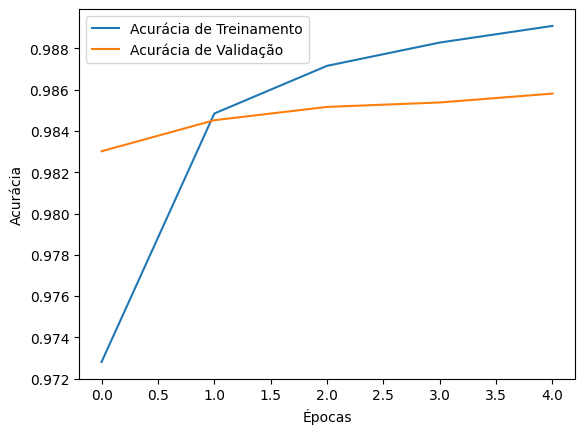

In [2]:
# Importando bibliotecas
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow_datasets as tfds

# Carregando o dataset
(ds_train, ds_val), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

# Preprocessamento: Redimensionamento e normalização
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    image = image / 255.0  # Normaliza para [0,1]
    return image, label

# Aplicando preprocessamento e preparação dos datasets
ds_train = ds_train.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
ds_val = ds_val.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

# Carregando o modelo pré-treinado MobileNetV2
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,  # Remove a última camada
    weights='imagenet'  # Usa pesos pré-treinados
)

# Congelando as camadas do modelo base
base_model.trainable = False

# Construindo o modelo final
model = models.Sequential([
    base_model,                          # Modelo pré-treinado
    layers.GlobalAveragePooling2D(),     # Camada de pooling global
    layers.Dense(1, activation='sigmoid')  # Classificação binária
])

# Compilando o modelo
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Treinando o modelo
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=5
)

# Avaliando o modelo
test_loss, test_acc = model.evaluate(ds_val)
print(f'\nAcurácia de validação: {test_acc:.2f}')

# Visualizando o desempenho
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
É um gato!


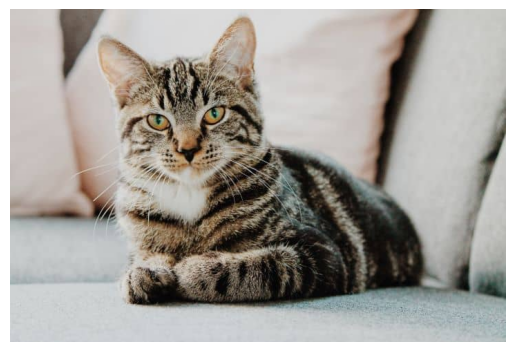

In [12]:
from tensorflow.keras.preprocessing import image
from google.colab import drive
drive.mount('/content/drive')

# Função para carregar e pré-processar a imagem
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Redimensiona a imagem para o tamanho esperado
    img_array = image.img_to_array(img)  # Converte a imagem para array NumPy
    img_array = np.expand_dims(img_array, axis=0)  # Adiciona a dimensão do batch
    img_array = img_array / 255.0  # Normaliza a imagem para o intervalo [0, 1]
    return img_array

# Caminho da imagem que você deseja classificar
image_path = '/content/drive/MyDrive/catordog/gato1.jpg'

# Pré-processamento da imagem
img = load_and_preprocess_image(image_path)

# Fazendo a previsão
prediction = model.predict(img)

# Exibindo o resultado
if prediction[0] > 0.5:
    print("É um cachorro!")
else:
    print("É um gato!")

# Exibindo a imagem
img_to_show = image.load_img(image_path)
plt.imshow(img_to_show)
plt.axis('off')  # Remove os eixos para uma melhor visualização
plt.show()